<a href="https://colab.research.google.com/github/ravinder2643/Deep-Learning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [1]:
#import basic  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset= pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.shape

(10000, 14)

In [9]:
## devide dataset into dependent and independent features
# removing name , row no, cutomer id
x= dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
#Feature Engineering
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)


In [13]:
#concatenate these columns with data frame
#also drop these features
x= x.drop(['Geography','Gender'],axis=1)

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
#concatenate
x=pd.concat([x,geography, gender], axis=1)

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [17]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [19]:
x_train= sc.fit_transform(x_train)

In [20]:
x_test=sc.fit_transform(x_test)

In [21]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
x_train.shape

(8000, 11)

In [25]:
#Part 2 Now lets  Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout

In [57]:
#initialize the ANN
classifier= Sequential()

In [58]:
#add input layer
classifier.add(Dense(units=11, activation='relu'))

In [59]:
#ading the first hidden layer
classifier.add(Dense(units=7, activation= 'relu'))
classifier.add(Dropout(0.2))

In [60]:
#second hidden layer
classifier.add(Dense(units=6, activation='relu' ))

In [61]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [62]:
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
import tensorflow
opt =tensorflow.keras.optimizers.Adam(learning_rate= 0.01)


In [64]:
#Early stopping:::: when accuracy neither increasing nor decreasing after fixed epochs
#then it will stop the training of model nd to save time
import tensorflow as tf

early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [65]:
model_history= classifier.fit(x_train, y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.5397 - accuracy: 0.7391 - val_loss: 0.4563 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4497 - accuracy: 0.7953 - val_loss: 0.4363 - val_accuracy: 0.8012
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4339 - accuracy: 0.8039 - val_loss: 0.4257 - val_accuracy: 0.8122
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4282 - accuracy: 0.8119 - val_loss: 0.4188 - val_accuracy: 0.8175
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4214 - accuracy: 0.8222 - val_loss: 0.4137 - val_accuracy: 0.8205
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4108 - accuracy: 0.8272 - val_loss: 0.4036 - val_accuracy: 0.8247
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4090 - accuracy: 0.8296 - val_loss: 0.3953 - val_accuracy:

In [66]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

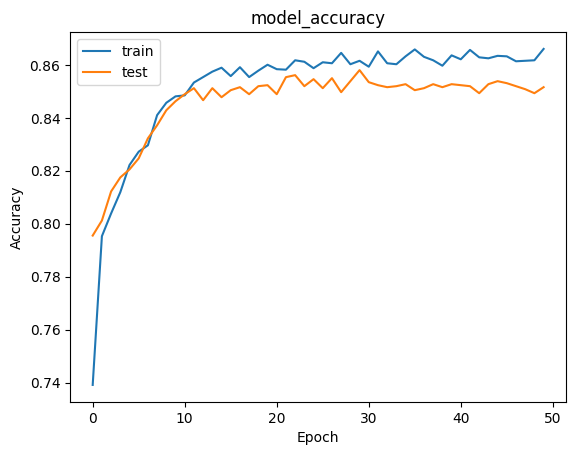

In [67]:
#plot summary for Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','test'], loc='upper left')
plt.show()

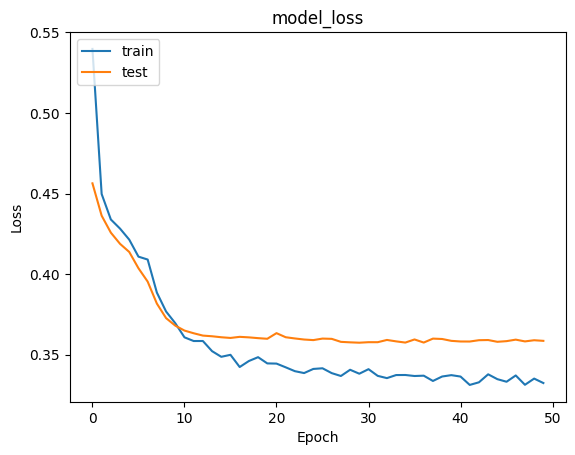

In [68]:
#plot for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train','test'], loc='upper left')
plt.show()

In [69]:
#for making the prediction and evaluating the model
#predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [70]:
#Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1535,   60],
       [ 206,  199]])

In [71]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.867

In [72]:
#get the weights
classifier.get_weights()

[array([[ 1.99082240e-01,  4.45341378e-01, -4.31682974e-01,
          9.08076540e-02,  8.54184553e-02, -9.29029845e-03,
         -1.26893088e-01,  2.73418814e-01,  2.04175338e-02,
         -2.22842678e-01, -1.22373458e-02],
        [-8.09633911e-01,  5.95534742e-02,  1.04827113e-01,
          6.36520609e-02,  1.36983767e-01,  4.86984074e-01,
         -2.25280300e-01, -6.42408490e-01,  1.35147348e-01,
          9.39572215e-01,  6.94838226e-01],
        [-1.25620469e-01,  7.24152848e-02,  4.89310212e-02,
          1.00854658e-01,  9.76549461e-02, -1.86429396e-01,
          1.28101870e-01,  1.15956902e-03, -1.11861015e-02,
          2.58127712e-02,  2.02399448e-01],
        [-7.30772838e-02,  2.06421688e-01, -5.39243340e-01,
         -1.51237547e-01, -4.29455191e-01, -1.28702193e-01,
         -1.69515312e-01, -1.26191288e-01,  3.31978649e-01,
         -4.43237036e-01, -1.34542435e-01],
        [ 1.06370099e-01, -2.05554932e-01,  5.90631008e-01,
          3.19458038e-01, -8.41489315e-01,  